## Traffic Violations

In [25]:
"""
Created on Mon Mar 20 10:21:12 2017

@author: Batul Zamin
"""

'\nCreated on Mon Mar 20 10:21:12 2017\n\n@author: Batul Zamin\n'

In [19]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
file = '/home/user/dummy/Traffic_Violations/Traffic_Violations.csv'

In [21]:
df = pd.read_csv(file, dtype=object)

## 1. Plot a histogram for Violation Type

In [5]:
label = df["Violation Type"]

In [6]:
count = label.value_counts()

In [7]:
x = list(range(len(count)))

## Histogram Plot

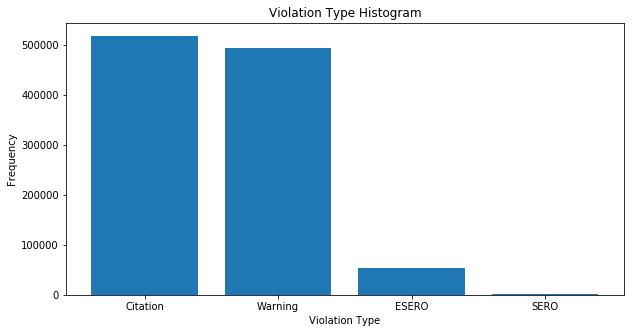

In [8]:
plt.figure(figsize=(10,5))
plt.bar(x, count)
plt.xticks(x, count.keys())
plt.title("Violation Type Histogram")
plt.xlabel("Violation Type")
plt.ylabel("Frequency")
plt.show()

## 2. Group by Location and plot the Number of Violations for the period 2013 to 2015

In [38]:
df1 = df[["Date Of Stop", "Location"]]

In [39]:
df1.is_copy = False

In [40]:
df1["Date Of Stop"] = pd.to_datetime(df1["Date Of Stop"])

In [41]:
df1 = df1[((df1["Date Of Stop"].dt.year)>=2013) & ((df1["Date Of Stop"].dt.year)<=2015)]

In [42]:
df1["ViolationYear"] = df1["Date Of Stop"].dt.year

In [43]:
group = df1.groupby(['Location']).ViolationYear.value_counts().unstack().fillna(0)

In [44]:
df2 = group.sort_values(by=2013, ascending=False)[0:15]

## Group By Location Plot

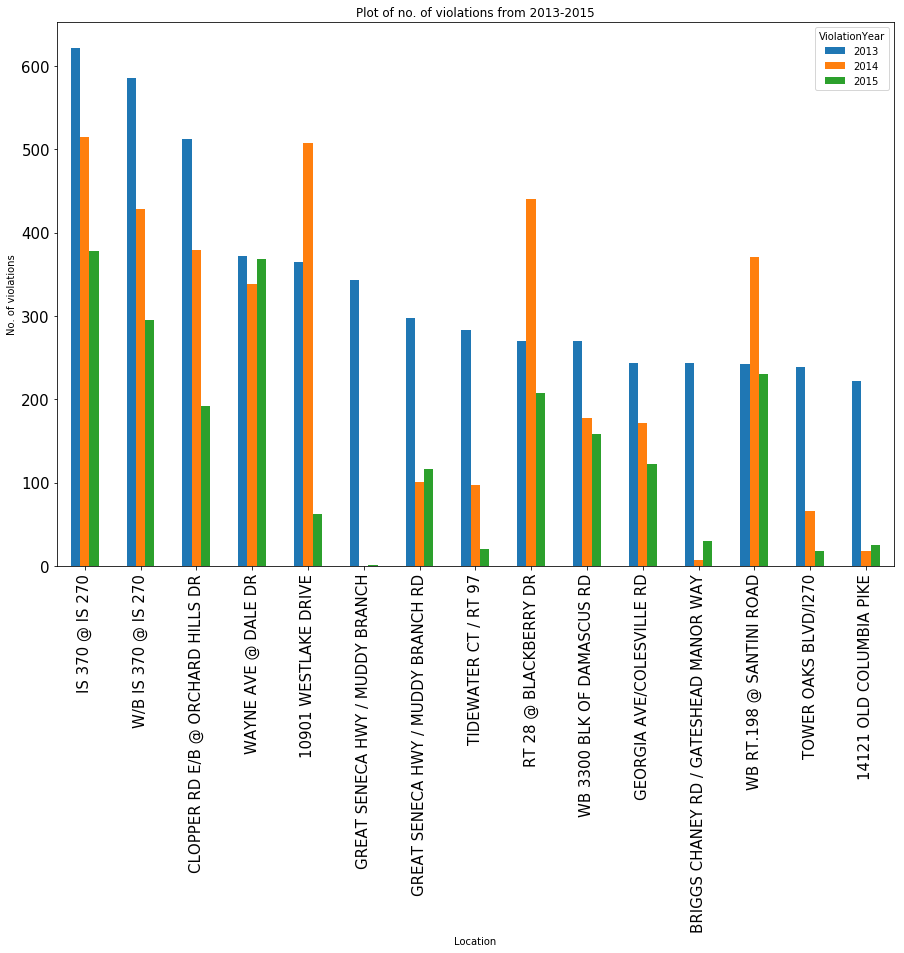

In [45]:
df2.plot(kind='bar', figsize=(15,10), title="Plot of no. of violations from 2013-2015", fontsize=15)
plt.xlabel("Location")
plt.ylabel("No. of violations")
plt.show()

## 3. Plot the aggregated Number of Violations first by District followed by Race

In [328]:
group_district = df.groupby(["SubAgency"]).Race.value_counts().unstack()

In [329]:
df4 = pd.DataFrame(group_district)

## Group By District and Stack By Race Plot

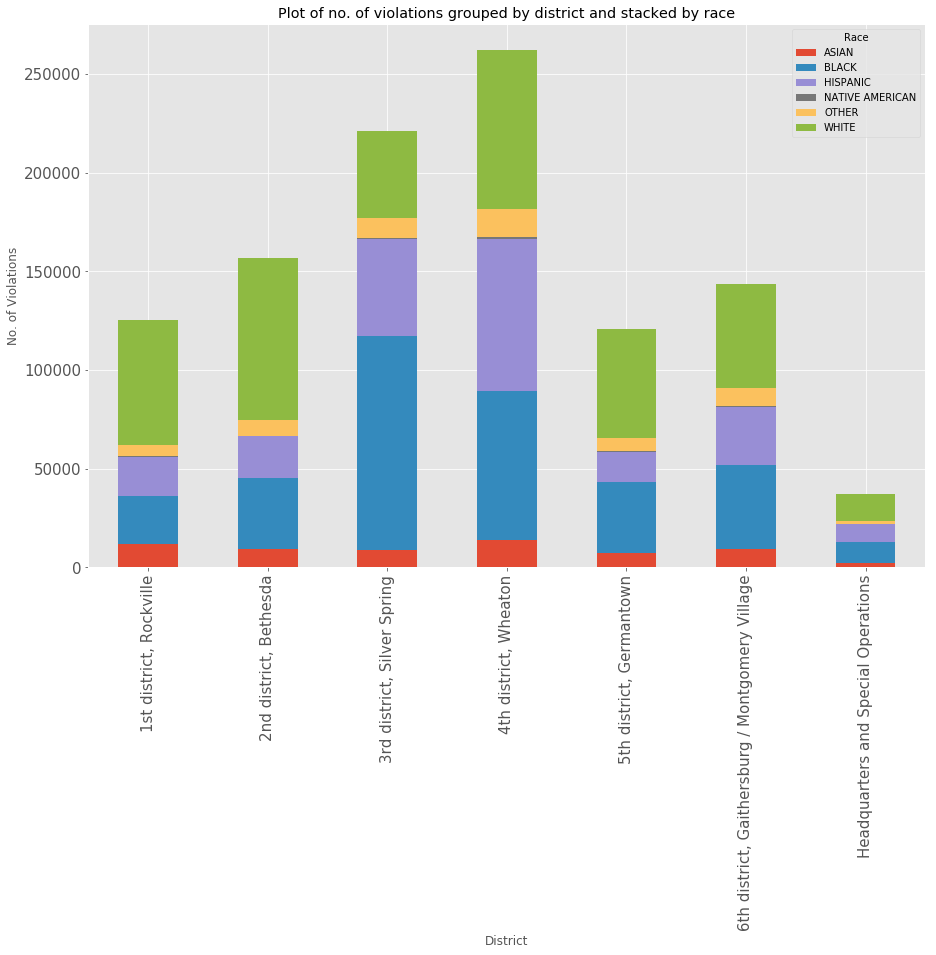

In [330]:
df4.plot(kind='bar', stacked=True, figsize=(15,10), fontsize=15)
plt.xlabel("District")
plt.ylabel("No. of Violations")
plt.title("Plot of no. of violations grouped by district and stacked by race")
plt.show()